In [35]:
import mlflow
import matplotlib.pyplot as plt
import numpy as np


In [36]:
runs = mlflow.search_runs(experiment_ids='307')
runs=runs[runs['params.adaptive_lambda_p']=='True']
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.integrated_squared_prediction_error,metrics.mse_from_sample,metrics.hausdorff_distance,metrics.optimal_relative_lambda,...,params.cross_validation,tags.mlflow.source.git.commit,tags.mlflow.source.type,tags.mlflow.runName,tags.Cross_Validation,tags.mlflow.user,tags.mlflow.note.content,tags.Adaptive,tags.mlflow.source.name,tags.Status
18,5049a8d715824ca88aee1c911f8e5af9,307,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 16:55:26.723000+00:00,2023-02-15 16:55:26.771000+00:00,0.010439,0.155902,288.0,5.764830,...,True,2b4b76eb47fa0d2757ea842fc8c7b9612927313a,LOCAL,legendary-smelt-337,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
19,278175da49fa4d8cbce8e9ccc7b6bab5,307,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 16:53:54.915000+00:00,2023-02-15 16:53:54.972000+00:00,0.012143,0.180289,130.0,1.355623,...,True,2b4b76eb47fa0d2757ea842fc8c7b9612927313a,LOCAL,youthful-mare-691,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
20,14c2a64ae3d145d6a12e839882e4a80d,307,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 16:51:38.552000+00:00,2023-02-15 16:51:38.639000+00:00,0.011048,0.151683,147.0,0.293601,...,True,2b4b76eb47fa0d2757ea842fc8c7b9612927313a,LOCAL,caring-calf-493,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
21,945a3a7cc9f14e8b9f24f92ac1bd25cc,307,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 16:50:00.959000+00:00,2023-02-15 16:50:01.011000+00:00,0.010754,0.157848,169.0,1.229165,...,True,2b4b76eb47fa0d2757ea842fc8c7b9612927313a,LOCAL,crawling-kite-865,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
22,92e8bb3b8c734a5da4393c940a31fa8c,307,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 16:43:18.374000+00:00,2023-02-15 16:43:18.484000+00:00,0.012722,0.153567,136.0,1.585366,...,True,2b4b76eb47fa0d2757ea842fc8c7b9612927313a,LOCAL,loud-dolphin-944,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,6c2a2d443abd43a8a7a4c31718d70e0a,307,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 04:16:09.112000+00:00,2023-02-15 04:16:09.162000+00:00,0.012760,0.157664,127.0,0.473195,...,True,2b4b76eb47fa0d2757ea842fc8c7b9612927313a,LOCAL,marvelous-moth-647,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
639,8438a5b35e374c4dbda39f4510f745bb,307,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 04:14:10.083000+00:00,2023-02-15 04:14:10.134000+00:00,0.014532,0.156182,126.0,0.152024,...,True,2b4b76eb47fa0d2757ea842fc8c7b9612927313a,LOCAL,upbeat-mole-237,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
640,0d11a786f4344137a4b95c5000eed098,307,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 04:12:14.320000+00:00,2023-02-15 04:12:14.367000+00:00,0.014943,0.157554,30.0,0.196541,...,True,2b4b76eb47fa0d2757ea842fc8c7b9612927313a,LOCAL,able-steed-783,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
641,e3dcf3fbfa0b47168af5490eb9beaea8,307,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 04:10:09.693000+00:00,2023-02-15 04:10:09.736000+00:00,0.011433,0.153967,161.0,0.574348,...,True,2b4b76eb47fa0d2757ea842fc8c7b9612927313a,LOCAL,dashing-rat-694,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved


In [40]:
snr=runs['params.signal_to_noise'].values
bandwidth=runs['metrics.bandwidth'].values

mse_ratio=runs['metrics.mse_true_diff'].values

unique_snr=np.unique(snr)
unique_bandwidth=np.unique(bandwidth)



mse_ratio=mse_ratio.reshape(unique_snr.shape[0],unique_bandwidth.shape[0],25)
mse_ratio=np.mean(mse_ratio,axis=2)

mse_ratio=mse_ratio.T


IndexError: tuple index out of range

TypeError: Input z must be 2D, not 1D

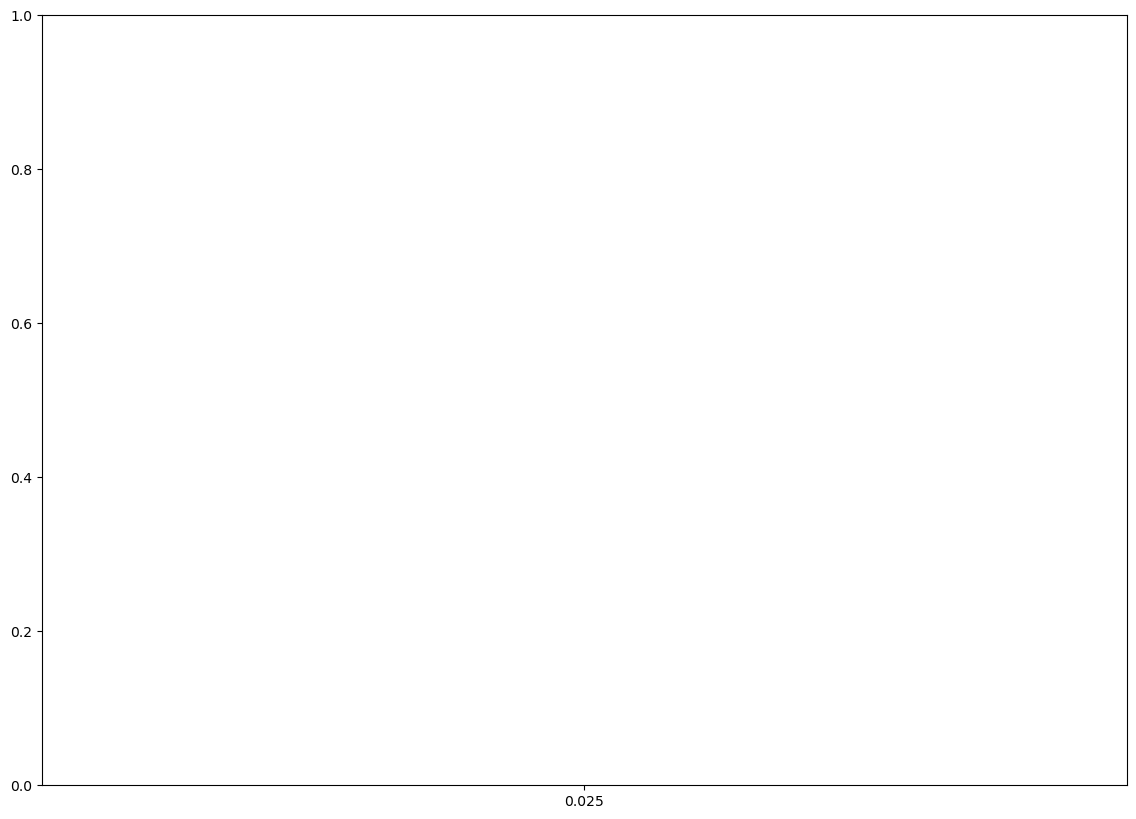

In [39]:
fig,ax=plt.subplots(figsize=(14,10))
plt.contourf(unique_snr,unique_bandwidth,mse_ratio,levels=20)
plt.colorbar()
plt.xlabel('SNR')
plt.ylabel('Bandwidth')
plt.title('MSE Ratio')
plt.show()
